In [1]:
from utils import *

from tqdm.notebook import tqdm
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24
np.random.seed(1)

In [2]:
# Taken from Duraiswami et al 2014
duraiswami_data = [0.3636363636, 0.8571428571, 1.083333333, 0.6356589147, 0.7741935484, 0.5, 0.4583333333]

# Taken from Aubele et al 1988
aubele_data = [1.142857143, 1.346153846, 1,  0.5217391304, 1.076923077, 
               0.7777777778, 0.5, 0.5, 1.055555556, 0.6363636364, 0.6, 
               1.8, 0.4736842105, 0.1612903226, 0.2272727273, 1.294117647, 
               0.4, 2.12, 0.4347826087, 2.222222222, 0.4285714286, 1, 0.8, 
               0.5, 0.875, 1.071428571, 1.176470588, 0.8947368421, 0.8461538462]


In [3]:
params = {}

params["dl"] = 1 # height upper
params["g"] = 9.8 # gravity
params["mu_l"] = 1e3 # viscosity lower
params["rho_l"] = 3000 # density lower

SIZE = int(1e4)
GRAN = int(1e5)

# random upper densities
rho_us = np.random.choice(np.linspace(params["rho_l"] * .9, params["rho_l"], GRAN), size=SIZE)

# random upper heights
d_us = np.random.choice(np.concatenate([np.linspace(.2, 1, GRAN), np.linspace(1.01, 5, GRAN)]), size=SIZE)

# random upper viscosities
mu_us = np.random.choice(np.linspace(3, 10, GRAN) * params["mu_l"], size=SIZE)


Ks = np.random.choice(np.logspace(2, 6, GRAN), size=SIZE)

Ups = Ks * (params["dl"] ** 2) / params["mu_l"]

Fs = np.sqrt((params["rho_l"]-rho_us) / \
                          rho_us * params["g"] * params["dl"] / (Ups ** 2))

stable_d2s = []
unstable_d2s = []
stable_froudes = []
unstable_froudes = []

for rho_u, mu_u, du, K, U_p, F in tqdm(zip(rho_us, mu_us, d_us, Ks, Ups, Fs), total=SIZE):

    params["mu_u"] = mu_u
    params["rho_u"] = rho_u
    params["Kl_p"] = K
    params["Ku_p"] = K
    params["du"] = du
    
    params["F"] = F
    params["U_p"] = U_p
    
    params["n"] = params["dl"] / params["du"]
    params["r"] = params["rho_l"] / params["rho_u"]
    params["m"] = params["mu_l"] / params["mu_u"]
    
    
    J = no_slip_J(**params)

    if J <= 0:
        stable_d2s.append(params["n"])
        stable_froudes.append(F)
    else:
        unstable_d2s.append(params["n"])
        unstable_froudes.append(F)
            
box_data = (duraiswami_data, aubele_data, stable_d2s, unstable_d2s)

  0%|          | 0/10000 [00:00<?, ?it/s]

[0.63565891 0.63565891]
[0.84615385 0.84615385]
[0.44516985 0.44516985]
[1.26383601 1.26383601]


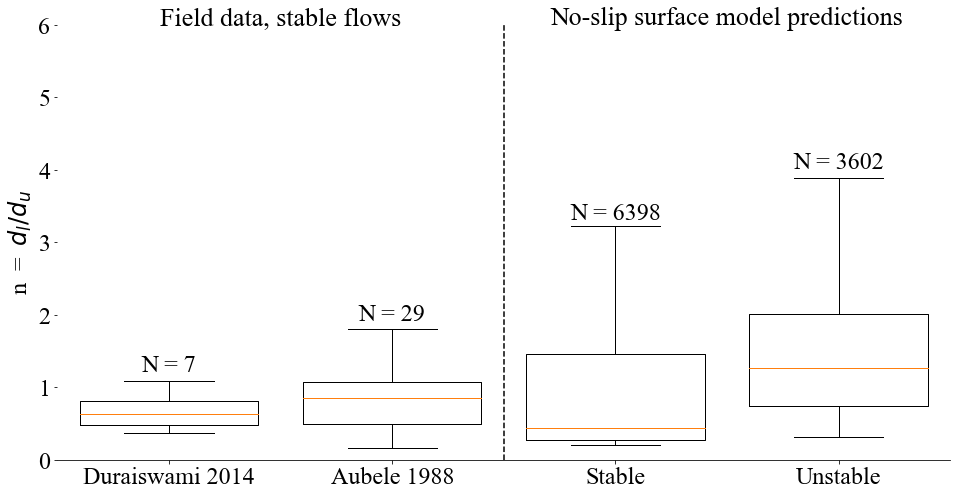

In [4]:
fig, ax = plt.subplots(figsize=(16,8))
F_SIZE = 24
labels=["Duraiswami 2014", "Aubele 1988", "Stable", "Unstable"]
bp = ax.boxplot(box_data, labels=labels, showfliers=False, widths=.8)

for m in bp["medians"]:
    print(m.get_ydata())

ax.axvline(2.5, color='black', linestyle='--')
ax.set_ylabel("n  =  $d_l / d_u$")
ax.set_ylim(bottom=0)
ax.set_ylim(top=6)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.text(3, 3.4, f"N = {len(stable_d2s)}", fontsize=F_SIZE, horizontalalignment="center", verticalalignment="center")
plt.text(4, 4.1, f"N = {len(unstable_d2s)}", fontsize=F_SIZE, horizontalalignment="center", verticalalignment="center")

plt.text(1, 1.3, "N = 7", fontsize=F_SIZE, horizontalalignment="center", verticalalignment="center")
plt.text(2, 2, "N = 29", fontsize=F_SIZE, horizontalalignment="center", verticalalignment="center")

F_SIZE = 26

plt.text(1.5, 6, "Field data, stable flows", fontsize=F_SIZE, horizontalalignment="center")
plt.text(3.5, 6, "No-slip surface model predictions", fontsize=F_SIZE, horizontalalignment="center")

VERBOSE = False
if VERBOSE:
    for idx, val in enumerate(box_data):
        print(labels[idx])
        print(len(box_data[idx]))
        print("mean", np.mean(box_data[idx]))
        print("med", np.median(box_data[idx]))
        print("std", np.std(box_data[idx]))
        print("var", np.var(box_data[idx]))
        print()

if not os.path.exists("paper_figures"):
    os.mkdir("paper_figures")
fig.savefig(f"paper_figures/box_plots_no_slip")

In [5]:
print(f"Value range stable froude: {np.sqrt(min(stable_froudes))} - {np.sqrt(max(stable_froudes))}")
print(f"Value range unstable froude: {np.sqrt(min(unstable_froudes))} - {np.sqrt(max(unstable_froudes))}")

Value range stable froude: 0.005054400396742193 - 3.1829448661521798
Value range unstable froude: 0.005336607029091178 - 0.4160786984395978


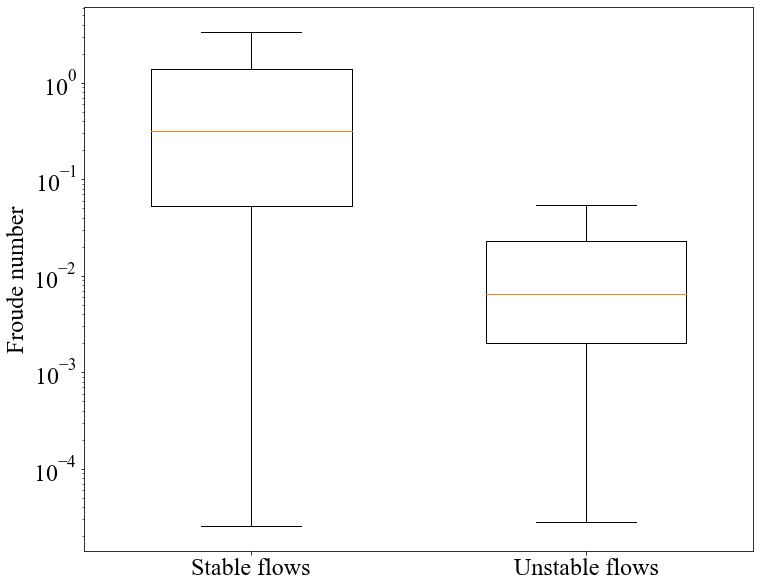

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
labels = ["Stable flows", "Unstable flows"]
ax.boxplot([stable_froudes, unstable_froudes], showfliers=False, labels=labels, widths=.6)
ax.set_yscale("log")
ax.set_ylabel("Froude number")
fig.savefig("paper_figures/froude_distribution")